# face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.관련된 라이브러리를 가져옵니다. 


request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.



In [3]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다. 

In [26]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [36]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [47]:
image_url = 'https://www.biztribune.co.kr/news/photo/202002/234114_91774_5631.jpg'

In [48]:
img = Image.open(BytesIO(requests.get(image_url).content))

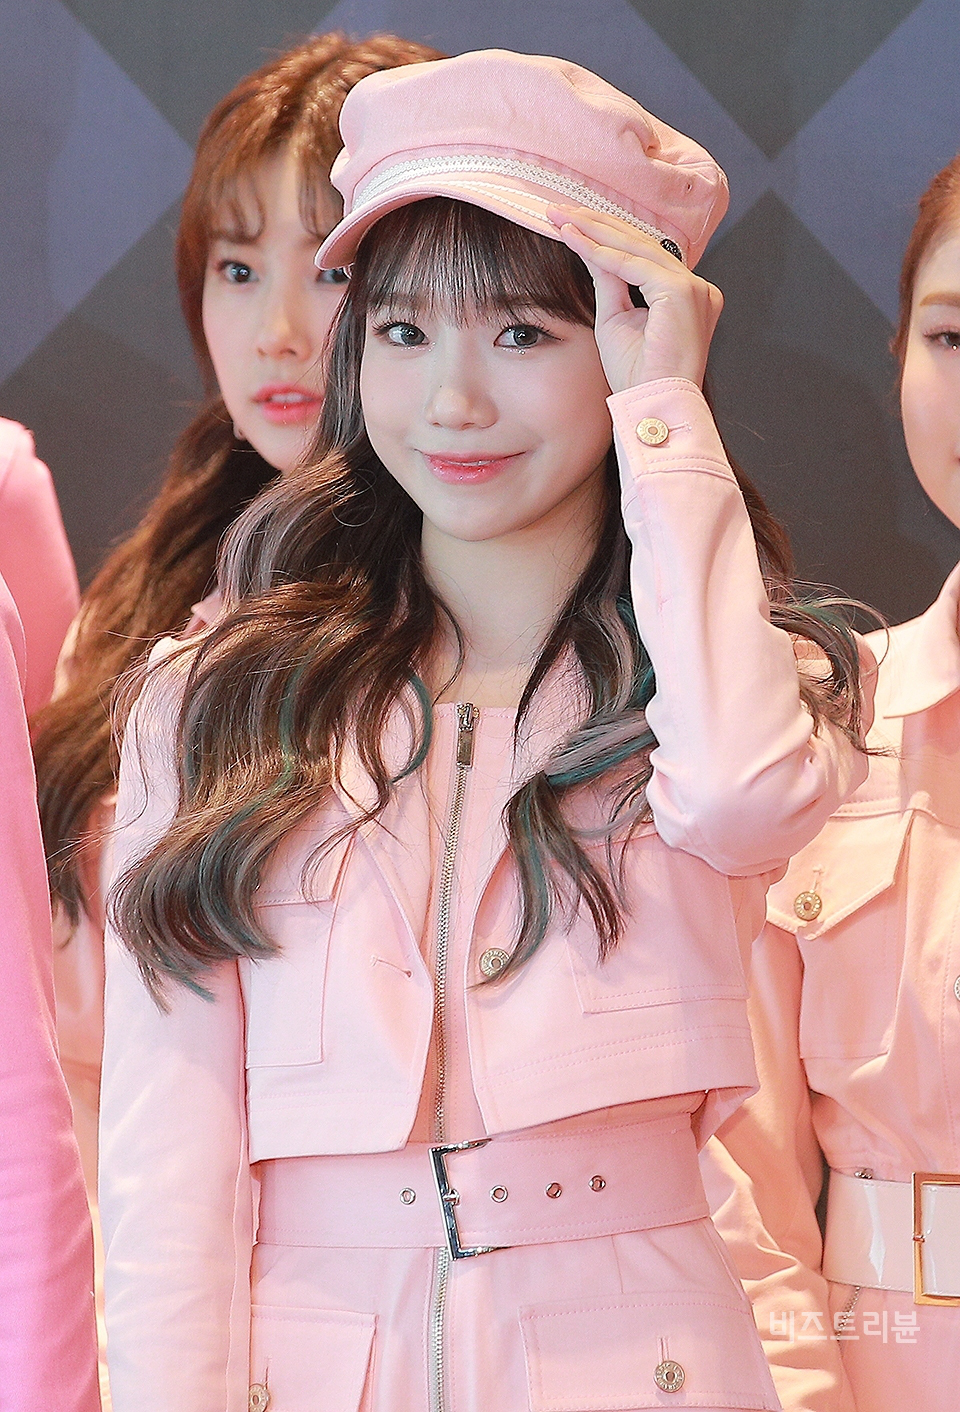

In [49]:
img

In [77]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID': 'true',
    'returnFaceAttributes': 'age,gender,emotion'
}



서비스를 호출해서 결과를 확인합니다. 

In [78]:
data = {'url': image_url}

In [79]:
response = requests.post(faceDetection_url, headers = headers, params = params, json = data )

In [80]:
faces = response.json()

In [81]:
faces

[{'faceId': 'a8b2fbfe-25b6-4f21-8c12-5ce6ffd081b9',
  'faceRectangle': {'top': 262, 'left': 337, 'width': 261, 'height': 261},
  'faceAttributes': {'gender': 'female',
   'age': 18.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'ce9b161b-bffd-43c8-bfed-454d8c92e0d7',
  'faceRectangle': {'top': 215, 'left': 166, 'width': 240, 'height': 240},
  'faceAttributes': {'gender': 'female',
   'age': 22.0,
   'emotion': {'anger': 0.001,
    'contempt': 0.001,
    'disgust': 0.001,
    'fear': 0.033,
    'happiness': 0.001,
    'neutral': 0.693,
    'sadness': 0.021,
    'surprise': 0.248}}}]

In [82]:
draw = ImageDraw.Draw(img)

In [92]:
for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left + width, top + height)), outline = 'blue')
    
    face_info = face['faceAttributes']
    age = face_info['age']
    gender = face_info['gender']
    
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    result = 'Gender: '+gender +'Age:'+ str(age) + 'Happiness:' + str(happiness)
    
    draw.text((left, top), result, fill = 'yellow')
    

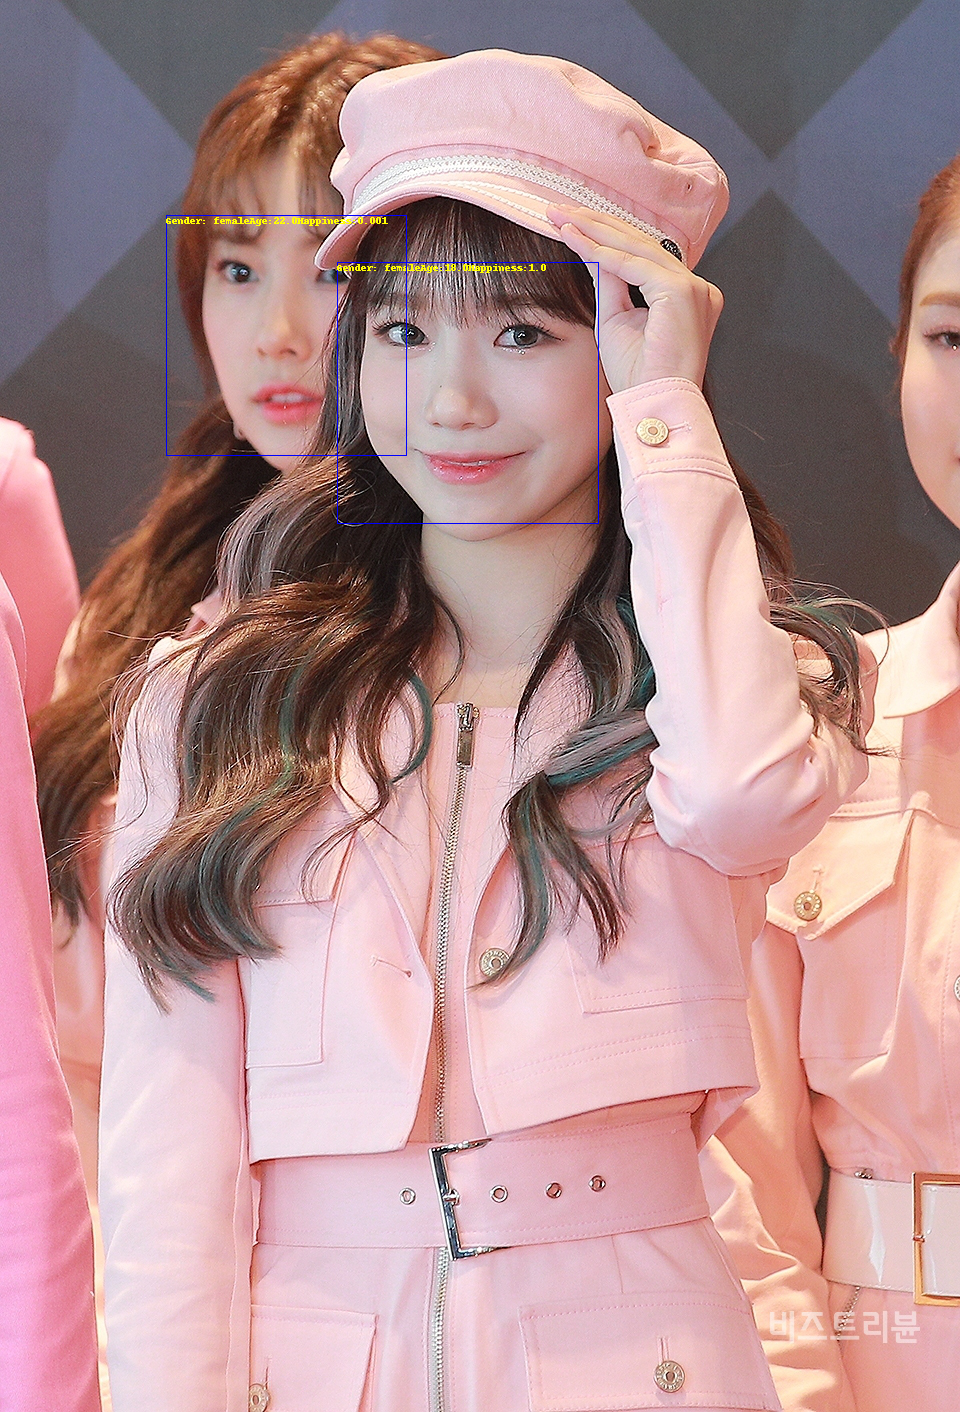

In [93]:
img